In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prediccion del valor de propiedades
Disponemos de una base de datos que relaciona el precio de una propiedad con su area y numero de habitaciones. Analizaremos los datos, implementaremos un modelo de aprenzidaje automatico para predecir el precio de otras propiedades.



In [333]:
data = pd.read_csv("ex1data2.txt", header = None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [334]:
print("la forma de los datos es: {}".format(data.shape))

la forma de los datos es: (47, 3)


In [335]:
#Tomamos la columna 1 y 2 como variables independientes, y la columna 3 como dependiente de las otras dos
X = data.iloc[:,0:2].values
y = data.iloc[:,2].values
m = len(y)

#Debido a la naturaleza de la base de datos, debemos normalizar las entradas, para que todas se muevan
#dentro de un rango similar, en orden de optimizar el algoritmo
def featureNormalize(X):
    """
    Recibe los datos, y los normaliza restando los datos por el promedio y dividiendo
    por la varianza.
    Devuelve la base de datos normalizada, y el promedio y la varianza que se uilizaran
    para realizar predicciones.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [336]:
X_norm, mu, sigma = featureNormalize(X)

### Funcion de costo

In [337]:
def computeCost(X, y, theta):
    """
    X matriz de m x n, y matriz de m x 1, theta matriz de n x 1.
    h es la funcion de hipotesis (basicamente la y predecida dado X arbitrario).
    Dados X, y, se calcula el costo (error) en funcion del parametro theta.
    Devuelve J escalar.
    """
    h = np.dot(X, theta)
    J = np.sum(np.power(h - y, 2)) / (2*m)
    return J

In [338]:
#Agregamos columna de 1's a X, y convertimos en una matriz a y
X_norm = np.insert(X_norm,0,1, axis = 1)
y = y.reshape((m,1))

#Inicializamos theta en ceros, y calculamos el costo
theta = np.zeros((X_norm.shape[1],1))
print("El costo de los parametros inicialziados en 0 es: {:e}".format(computeCost(X_norm,y,theta)))

El costo de los parametros inicialziados en 0 es: 6.559155e+10


### Gradient Descent
Calculamos los parametros optimos de la misma manera que en la regresion lineal simple

In [339]:
def gradientDescent(X, y, theta, alpha, iterations):
    """
    En J_history se guarda el valor de costo despues de cada iteracion.
    En theta se guardan los parametros optimizados.
    """
    J_history = []
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T,temp)
        theta = theta - (alpha/m) * temp
        J_history.append(computeCost(X, y, theta))
    return theta, J_history

In [340]:
#Configuramos el algoritmo con un numero de iteraciones, alpha es el "learning rate"
alpha = 0.1
iterations = 500

#Ejecutamos el algoritmo
theta, J_history = gradientDescent(X_norm, y, theta, alpha, iterations)

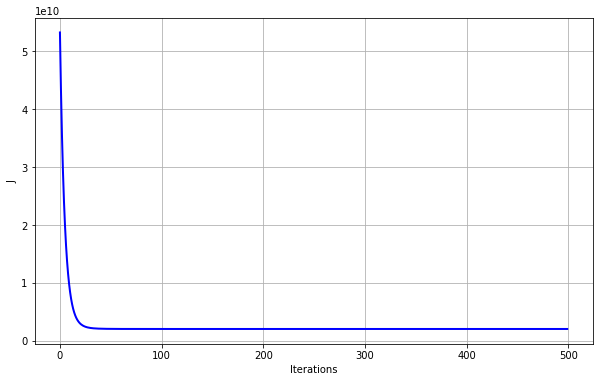

In [341]:
#Veamos como varia el costo despues de cada ajuste a theta en el algoritmo
plt.figure(figsize=(10,6))
plt.plot(J_history,  color ="blue", linewidth = 2)
plt.xlabel('Iterations')
plt.ylabel("J")
plt.grid()
plt.show()

In [342]:
#Veamos como se redujo el costo despues de aplicar el algoritmo y obtener los parametros optimos
print("Ver como bajo considerablemente el costo con los parametros optimizados: {:e}".format(computeCost(X_norm,y,theta)))

Ver como bajo considerablemente el costo con los parametros optimizados: 2.043280e+09


In [343]:
#Predecir precio de habitacion 1650 sq-ft y 3 habitaciones
def predictPrice(area, number_rooms, theta):
  price = theta[0] + theta[1] * (area - mu[0]) / sigma[0] + theta[2] * (number_rooms - mu[1])/sigma[1]
  return price[0]

In [344]:
print("Precio de una propiedad de 1650 sq-ft y 3 habitaciones: {} dolares".format(int(predictPrice(1650, 3, theta))))

Precio de una propiedad de 1650 sq-ft y 3 habitaciones: 293081 dolares


## Ecuación normal

$$ \theta = (X^TX)^{-1}X^Ty$$

La ecuacion normal **no** necesita normalizar las variables independientes

In [345]:
#Insertamos columna de 1's
X = np.insert(X,0,1, axis = 1)

#Realizamos el calculo de theta
theta = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))

In [346]:
#Realizemos la misma prediccion que hicimos con el algoritmo anterior:
#Predecir precio de habitacion 1650 sq-ft y 3 habitaciones

price = theta[0] + theta[1]*1650 + theta[2]*3
price[0]

293081.4643348973